<h1><center> Task 1 </center></h1>

*~~~~ Building a scoring function to determine the desirability of the houses : *

Which variables are used by the function?

- The function uses four variables from the Kaggle dataset which are finishedsquarefeet15 (Total area of the property), roomcnt (number of rooms in the house), structuretaxvaluedollarcnt (assessed value of the property), yearbuilt (year in which the property was built)


- The scoring function with all these parameters is as following, 

desirability_score  = (2 x room_count) + year_built - (structure_tax_value_dollar / total_area)

- The idea here is to minimize the per square feet dollar cost of the property. That's why the (structure_tax_value_dollar / total_area) factor is substracted from the other values. In addition to that, the apartments built late are given priority and properties with more rooms will be given the most preference.



In [1]:
# Loading the properties file into a dataframe

import pandas as pd
import numpy as numpy
import scipy.spatial.distance as scp_dst
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.colors as clrs
import matplotlib.pyplot as plt

df = pd.read_csv('properties_2017.csv', low_memory=False)

In [9]:
# Cleaning the data required to compute the scoring function

df_clean_for_scoring = df[numpy.isfinite(df['finishedsquarefeet15'])]
df_clean_for_scoring = df_clean_for_scoring[numpy.isfinite(df_clean_for_scoring['roomcnt']) & df_clean_for_scoring['roomcnt'] != 0]
df_clean_for_scoring = df_clean_for_scoring[numpy.isfinite(df_clean_for_scoring['structuretaxvaluedollarcnt'])]
df_clean_for_scoring = df_clean_for_scoring[numpy.isfinite(df_clean_for_scoring['yearbuilt'])]
df_clean_for_scoring # has 396 rows (these might be the houses)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
396,17072870,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,1.0,NaN,79576.0,265257.0,2016.0,185681.0,2880.52,NaN,NaN,6.111002e+13
516,17101256,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,NaN,...,1.0,NaN,99619.0,278189.0,2016.0,178570.0,3182.82,NaN,NaN,6.111001e+13
585,17122643,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,1.0,NaN,520033.0,543419.0,2016.0,23386.0,7264.84,NaN,NaN,6.111005e+13
783,17171990,NaN,NaN,NaN,3.0,3.0,NaN,NaN,3.0,66.0,...,2.0,NaN,609150.0,2132025.0,2016.0,1522875.0,24017.74,NaN,NaN,6.111004e+13
801,17180389,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,1.0,NaN,68899.0,91841.0,2016.0,22942.0,1086.08,NaN,NaN,6.111004e+13
30061,17099149,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,105061.0,193478.0,2016.0,88417.0,2242.82,NaN,NaN,NaN
30155,17064216,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,100503.0,313125.0,2016.0,212622.0,3642.26,NaN,NaN,6.111000e+13
30201,17075814,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,NaN,...,1.0,NaN,382347.0,699381.0,2016.0,317034.0,7419.28,NaN,NaN,6.111002e+13
30218,17079778,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1.0,NaN,279600.0,451752.0,2016.0,172152.0,4757.86,NaN,NaN,6.111003e+13
30547,17164943,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,...,1.0,NaN,164848.0,347138.0,2016.0,182290.0,4164.02,NaN,NaN,6.111004e+13


In [10]:
# Compute the scoring function

df_clean_for_scoring ['costperarea'] = df_clean_for_scoring['structuretaxvaluedollarcnt'] / df_clean_for_scoring['finishedsquarefeet15']
df_clean_for_scoring ['desirabilityscore'] = (df_clean_for_scoring['roomcnt']*2) + (df_clean_for_scoring['yearbuilt']) - (df_clean_for_scoring['structuretaxvaluedollarcnt'] / df_clean_for_scoring['finishedsquarefeet15']) 
df_sorted_on_score = df_clean_for_scoring.sort_values(['desirabilityscore'], ascending=[False])


In [11]:
# Top 10 desirable properties

df_sorted_on_score_limited_columns = df_sorted_on_score.loc[:,['parcelid','roomcnt','yearbuilt','costperarea','desirabilityscore']]
df_sorted_on_score_limited_columns.head(10)

,parcelid,roomcnt,yearbuilt,costperarea,desirabilityscore
2282638,17231357,30.0,1981.0,29.057248,2011.942752
2968344,17231374,18.0,1981.0,29.013350,1987.986650
1567132,17231361,30.0,1981.0,58.114496,1982.885504
1000213,17231360,30.0,1981.0,58.114496,1982.885504
1417843,17231366,30.0,1981.0,58.114496,1982.885504
2699898,17231363,30.0,1981.0,58.114496,1982.885504
1716364,17231356,30.0,1981.0,58.114496,1982.885504
433638,17231359,30.0,1981.0,58.114496,1982.885504
2849047,17231358,30.0,1981.0,58.114496,1982.885504
2550914,17231368,30.0,1981.0,58.114496,1982.885504


In [12]:
# 10 least desirable properties

df_sorted_on_score_limited_columns = df_sorted_on_score_limited_columns.sort_values(['desirabilityscore'], ascending=[True])
df_sorted_on_score_limited_columns.head(10)


,parcelid,roomcnt,yearbuilt,costperarea,desirabilityscore
552512,17161800,3.0,2003.0,1539.769231,469.230769
585,17122643,3.0,1988.0,822.837025,1171.162975
775757,17062792,5.0,2010.0,712.691612,1307.308388
253689,17076964,4.0,1925.0,502.994012,1430.005988
2312412,17276423,3.0,1927.0,488.767143,1444.232857
2043646,17102115,4.0,1929.0,482.385913,1454.614087
850848,17171888,4.0,1988.0,540.831765,1455.168235
1805455,17101720,5.0,1926.0,470.400000,1465.600000
582115,17081665,4.0,1979.0,515.246815,1471.753185
1820320,17073050,2.0,1988.0,513.196429,1478.803571


<h1><center> Task 2 & 3 </center></h1>

In [13]:
# Cleaning the data required to compute the pair-wise distance

df_clean_for_distance = df_sorted_on_score[numpy.isfinite(df_sorted_on_score['latitude'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['longitude'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['regionidzip'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['finishedsquarefeet15'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['unitcnt'])]
df_clean_for_distance = df_clean_for_distance[numpy.isfinite(df_clean_for_distance['roomcnt'])]



In [43]:
# from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.colors as clrs
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

df_clean_for_distance_subset = df_clean_for_distance[['latitude','longitude','regionidzip','finishedsquarefeet15','unitcnt','roomcnt']] # has 181796 rows 

# Normalization
df_clean_for_distance_subset_normalised = preprocessing.Normalizer().fit_transform(df_clean_for_distance_subset)
df_clean_for_distance_subset_normalised = pd.DataFrame(df_clean_for_distance_subset_normalised)
df_clean_for_distance_subset_normalised.columns = df_clean_for_distance_subset.columns
df_clean_for_distance_subset_normalised.index = df_clean_for_distance_subset.index

df_clean_for_distance_subset_list = df_clean_for_distance_subset_normalised.values.tolist()

head_first = df_clean_for_distance_subset_list[10]
head_second = df_clean_for_distance_subset_list[30]
head_first_head_second_dist = distance.euclidean(head_first, head_second)*1000
head_first_head_second_dist
# head_first_head_second_dist
# KMeans.fit(df_clean_for_distance_subset)

# 0.36595834011183426 (100, 311)
# 0.0860883225739298 (100, 101)




0.0003592679639480327

In [45]:
dist = np.zeros((4,4))
dist[0][0] = distance.euclidean(df_clean_for_distance_subset_list[10], df_clean_for_distance_subset_list[10])*1000
dist[0][1] = distance.euclidean(df_clean_for_distance_subset_list[10], df_clean_for_distance_subset_list[30])*1000
dist[0][2] = distance.euclidean(df_clean_for_distance_subset_list[10], df_clean_for_distance_subset_list[280])*1000
dist[0][3] = distance.euclidean(df_clean_for_distance_subset_list[10], df_clean_for_distance_subset_list[300])*1000

dist[1][1] = distance.euclidean(df_clean_for_distance_subset_list[30], df_clean_for_distance_subset_list[30])*1000
dist[1][2] = distance.euclidean(df_clean_for_distance_subset_list[30], df_clean_for_distance_subset_list[280])*1000
dist[1][3] = distance.euclidean(df_clean_for_distance_subset_list[30], df_clean_for_distance_subset_list[300])*1000

dist[2][2] = distance.euclidean(df_clean_for_distance_subset_list[280], df_clean_for_distance_subset_list[280])*1000
dist[2][3] = distance.euclidean(df_clean_for_distance_subset_list[280], df_clean_for_distance_subset_list[300])*1000

dist[3][3] = distance.euclidean(df_clean_for_distance_subset_list[300], df_clean_for_distance_subset_list[300])*1000



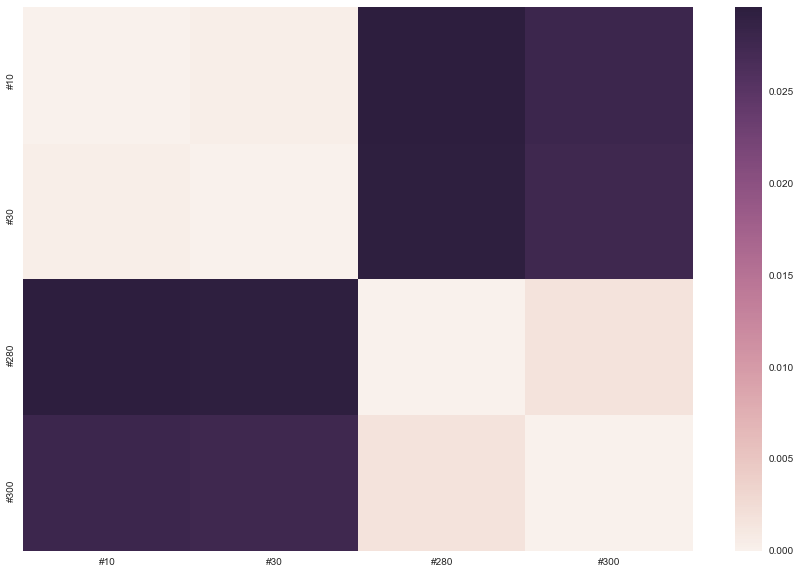

In [46]:
import seaborn as sns; sns.set()
%matplotlib inline 

data = numpy.array([['abc','#10', '#30', '#280', '#300'],
                 ['#10', dist[0][0], dist[0][1], dist[0][2], dist[0][3]],
                 ['#30', dist[0][1], dist[1][1], dist[1][2], dist[1][3]],
                 ['#280',dist[0][2], dist[1][2], dist[2][2], dist[2][3]],
                 ['#300',dist[0][3], dist[1][3], dist[2][3], dist[3][3]]])

x = data[1:,1:]
x = x.astype(numpy.float)

dataframe = pd.DataFrame(x,
                  index=data[1:,0],
                  columns=data[0,1:])

plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(dataframe)



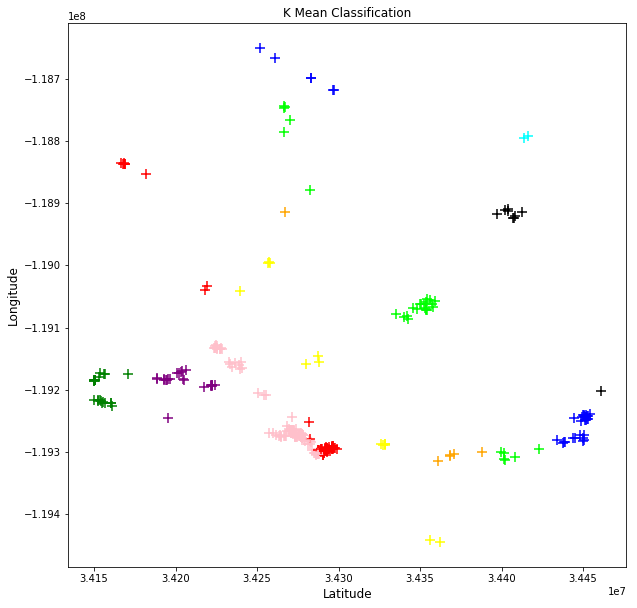

In [25]:
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.colors as clrs
import matplotlib.pyplot as plt

df_clean_for_clustering = df_sorted_on_score[numpy.isfinite(df_sorted_on_score['latitude'])]
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['longitude'])]
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['regionidzip'])]
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['finishedsquarefeet15'])]
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['unitcnt'])] 
df_clean_for_clustering = df_clean_for_clustering[numpy.isfinite(df_clean_for_clustering['roomcnt'])]

df_clean_for_clustering_subset = df_clean_for_clustering[['latitude','longitude','regionidzip','finishedsquarefeet15','unitcnt','roomcnt']]

# Normalization 
df_clean_for_clustering_subset_normalised = preprocessing.Normalizer().fit_transform(df_clean_for_clustering_subset)
df_clean_for_clustering_subset_normalised = pd.DataFrame(df_clean_for_clustering_subset_normalised)
df_clean_for_clustering_subset_normalised.columns = df_clean_for_clustering_subset.columns
df_clean_for_clustering_subset_normalised.index = df_clean_for_clustering_subset.index

# K Means for clustering
km = KMeans(n_clusters=10, max_iter=1000)
km.fit(df_clean_for_clustering_subset_normalised)
km.labels_

# Set the size of the plot
plt.figure(figsize=(10,10))

# Create a colormap
colormap = numpy.array(['red', 'lime', 'black', 'green','blue', 'purple', 'yellow', 'pink', 'orange', 'cyan'])

plt.title('K Mean Classification')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.scatter(df_clean_for_distance_subset.latitude, df_clean_for_distance_subset.longitude, c=colormap[km.labels_], marker='+', s=100)
plt.show()



In [ ]:
# TODO: Add the map for all the data points


<h1><center> Task 4 </center></h1>

In [57]:
# TODO: Write the details on how we got the zipcode and the mapping with external data

df_new = df[numpy.isfinite(df['regionidzip'])]
df_new_unique_zip = df_new.regionidzip.unique()

# df_new_unique_zip

df_zip_income = pd.read_csv('external_zipcode_mediansalary_mapping.csv', low_memory=False)
df_correct_parcelid_zipcode = pd.read_csv('external_parcelid_correct_zipcode_mapping.csv', low_memory=False)
df_correct_parcelid_zipcode

df_parcelid_mediansalary = pd.merge(df_correct_parcelid_zipcode, df_zip_income, on='zipcode', how='outer')
df_parcelid_mediansalary = df_parcelid_mediansalary[numpy.isfinite(df_parcelid_mediansalary['parcelid'])]
df_parcelid_mediansalary


# Used mean salary in the data where values were missing

# df_left_unique_zip = df_new_unique_zip.notin(df_zip_income['regionidzip'].values)
# df_left_unique_zip
# print (list(set(df_new_unique_zip)-set(df_zip_income['regionidzip'].values)))
# df_zip_income.columns.values[0] = 'regionidzip'


# df_zip_median_salary = df_zip_income.loc[df_zip_income['regionidzip'].isin(df_new_unique_zip)]
# # df_zip_median_salary

df_with_income = pd.merge(df_new, df_parcelid_mediansalary, on='parcelid', how='outer')
df_with_income = df_with_income[numpy.isfinite(df_with_income['mediansalary'])] # has 1794229 rows

df_with_income.head(10)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,zipcode,mediansalary,Pop
0,10754147.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,9.0,2016.0,9.0,NaN,NaN,NaN,NaN,91302.0,135603.0,"25,709"
1,10759547.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,90290.0,122885.0,"6,363"
2,10843547.0,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN,90230.0,74348.0,"31,766"
3,10859147.0,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN,91423.0,75759.0,"30,991"
4,10879947.0,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN,91606.0,41392.0,"44,958"
5,10898347.0,NaN,NaN,NaN,0.0,0.0,4.0,4.0,NaN,NaN,...,287634.0,2016.0,108562.0,3661.28,NaN,NaN,NaN,91601.0,47987.0,"37,180"
7,10940747.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,698984.0,2016.0,595431.0,7857.84,NaN,NaN,NaN,91502.0,46111.0,"11,371"
8,10954547.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,9.0,2016.0,9.0,NaN,NaN,NaN,NaN,91504.0,72543.0,"24,939"
9,10976347.0,NaN,NaN,NaN,0.0,0.0,3.0,4.0,NaN,NaN,...,265184.0,2016.0,43413.0,4054.76,NaN,NaN,NaN,91340.0,38768.0,"27,044"
10,11070347.0,1.0,NaN,NaN,4.0,4.0,NaN,1.0,4.0,NaN,...,192544.0,2016.0,53784.0,2460.72,NaN,NaN,NaN,91326.0,110833.0,"33,708"


In [58]:
# THIS CODE COMBINES THE ERROR-TABLE (training data) AND FEATURE TABLE (properties data with median salary) (OUTER JOIN)

train_df = pd.read_csv('train_2017.csv') # TODO: Need to change these files' locations

parcel_value_list = train_df['parcelid']

df_filter_tained_parcel_ids = df_with_income[df_with_income.parcelid.isin(parcel_value_list)]

parcel_value_list2 = df_filter_tained_parcel_ids['parcelid']

train_df_2 = train_df[train_df.parcelid.isin(parcel_value_list2)]
sorted_df_filter_tained_parcel_ids = df_filter_tained_parcel_ids.sort_values(by='parcelid', ascending=1)

train_df_2 = train_df_2.drop_duplicates(['parcelid'], keep='last') #90150
sorted_train_df_2 = train_df_2.sort_values(by='parcelid', ascending=1)

train_df_joined = pd.merge(sorted_df_filter_tained_parcel_ids, sorted_train_df_2, on='parcelid', how='outer')
train_df_joined.head(10) # has 46323 rows



,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,zipcode,mediansalary,Pop,logerror,transactiondate
0,1.07119e+07,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,374484.0,7659.36,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",-0.007357,2017-07-07
1,1.07119e+07,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,407000.0,8123.91,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",0.021066,2017-08-29
2,1.07119e+07,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,285332.0,6673.24,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",0.077174,2017-04-04
3,1.07119e+07,1.0,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,339116.0,5376.97,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",0.001271,2017-01-30
4,1.0712e+07,1.0,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,22755.0,1272.29,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",0.012092,2017-08-01
5,1.07121e+07,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,257725.0,7271.88,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",0.027212,2017-03-30
6,1.07121e+07,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,85890.0,3477.68,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",-0.039533,2017-05-25
7,1.07122e+07,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,356999.0,5818.06,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",0.041968,2017-03-14
8,1.07122e+07,1.0,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,264309.0,4704.60,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",0.153774,2017-01-06
9,1.07123e+07,1.0,NaN,NaN,3.0,4.0,NaN,7.0,3.0,NaN,...,555300.0,8643.58,NaN,NaN,6.037113e+13,91304.0,66044.0,"50,230",0.014293,2017-03-23


Coefficients: 
 [  3.74872875e-05  -5.19456167e-09]
Mean squared error: 0.021737263
Variance score: -0.025127792


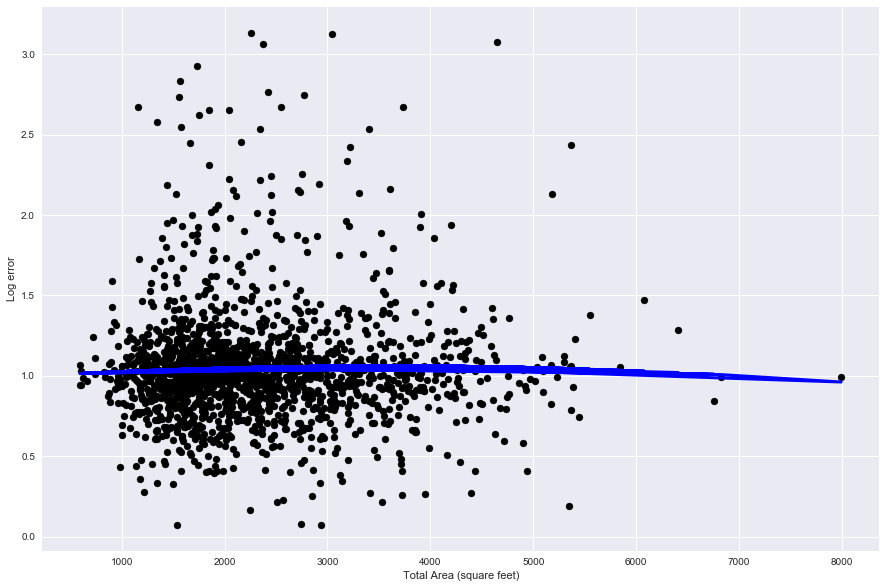

In [60]:
# Exp:1 (Old model)

# Results
# Coefficients: 
#  [  3.74872875e-05  -5.19456167e-09]
# Mean squared error: 0.021737263
# Variance score: -0.025127792
    
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Improvement_0 : Removed the NaN value from the training data
train_df_joined_no_logerror_nan = train_df_joined[numpy.isfinite(train_df_joined['logerror'])]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_nan = train_df_joined_no_logerror_nan [train_df_joined_no_logerror_nan ['logerror'] < 0.5]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_nan[numpy.isfinite(train_df_joined_no_logerror_nan['finishedsquarefeet15'])]
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan [train_df_joined_no_logerror_finishedsquarefeet15_nan ['finishedsquarefeet15'] < 10000]


train_x1 = train_df_joined_no_logerror_finishedsquarefeet15_nan.finishedsquarefeet15.values

# Improvement_2 : Converting the model to polynomial regression y = (a*x)+(a*x^2) from linear regression
train_x2 = np.power(train_df_joined_no_logerror_finishedsquarefeet15_nan.finishedsquarefeet15.values, 2)
train_x = np.vstack((train_x1, train_x2)).T

train_y = train_df_joined_no_logerror_finishedsquarefeet15_nan.logerror.values

# Improvement_3 : Scaling the y-axis to f(y) = 10^y values, where the y value is 'finishedsquarefeet15'
train_y = np.power(10,train_y)

regr1 = linear_model.LinearRegression()
regr1.fit(train_x, train_y)

# coefficients
print('Coefficients: \n', regr1.coef_)

test_x = train_x
test_y = train_y

pred_y = regr1.predict(test_x)

# The mean squared error
print("Mean squared error: %.9f"
      % mean_squared_error(np.log10(test_y), np.log10(pred_y)))

# variance score
print("Variance score: %.9f"
      % r2_score(np.log10(test_y), np.log10(pred_y)))


plt.rcParams['figure.figsize']=(15,10)
plt.xlabel("Total Area (square feet)")
plt.ylabel("Log error")
plt.scatter(train_x1, train_y,  color='black')
plt.plot(train_x1, pred_y, color='blue', linewidth=3)
plt.show()

Coefficients: 
 [ -6.58028573e-07   3.50152749e-12]
Mean squared error: 0.014474274
Variance score: -0.011371597


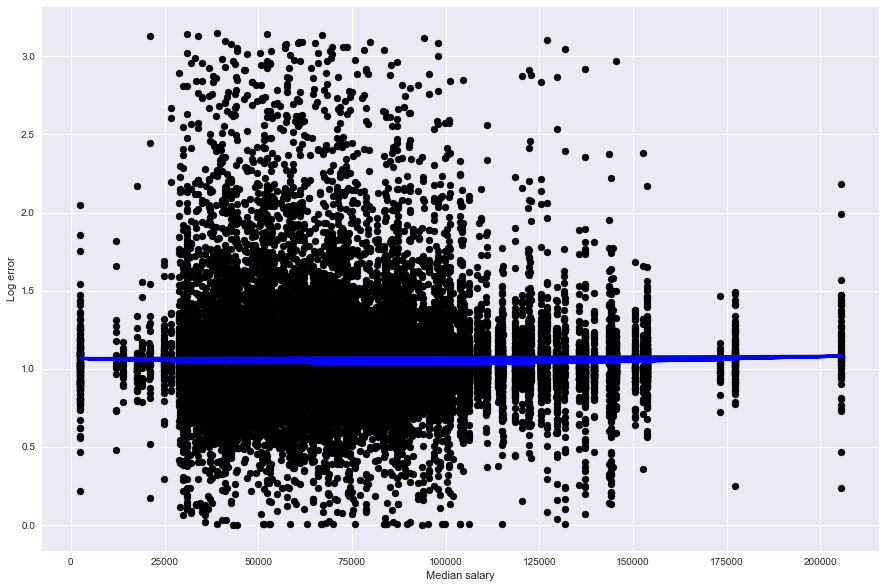

In [61]:
# Exp:2 (New model - with only income as a feature)

# Results
# Coefficients: 
#  [ -6.58028573e-07   3.50152749e-12]
# Mean squared error: 0.014474274
# Variance score: -0.011371597
    
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Improvement_0 : Removed the NaN value from the training data
train_df_joined_no_logerror_nan = train_df_joined[numpy.isfinite(train_df_joined['logerror'])]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_nan = train_df_joined_no_logerror_nan [train_df_joined_no_logerror_nan ['logerror'] < 0.5]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_nan[numpy.isfinite(train_df_joined_no_logerror_nan['mediansalary'])]
# train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan [train_df_joined_no_logerror_finishedsquarefeet15_nan ['regionidzip']]


train_x1 = train_df_joined_no_logerror_finishedsquarefeet15_nan.mediansalary.values

# Improvement_2 : Converting the model to polynomial regression y = (a*x)+(a*x^2) from linear regression
train_x2 = np.power(train_df_joined_no_logerror_finishedsquarefeet15_nan.mediansalary.values, 2)
train_x = np.vstack((train_x1, train_x2)).T

train_y = train_df_joined_no_logerror_finishedsquarefeet15_nan.logerror.values

# Improvement_3 : Scaling the y-axis to f(y) = 10^y values, where the y value is 'finishedsquarefeet15'
train_y = np.power(10,train_y)

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# coefficients
print('Coefficients: \n', regr.coef_)

test_x = train_x
test_y = train_y

pred_y = regr.predict(test_x)

# The mean squared error
print("Mean squared error: %.9f"
      % mean_squared_error(np.log10(test_y), np.log10(pred_y)))

# variance score
print("Variance score: %.9f"
      % r2_score(np.log10(test_y), np.log10(pred_y)))


plt.rcParams['figure.figsize']=(15,10)
plt.xlabel("Median salary")
plt.ylabel("Log error")
plt.scatter(train_x1, train_y,  color='black')
plt.plot(train_x1, pred_y, color='blue', linewidth=3)
plt.show()

Coefficients: 
 [  3.43424755e-05  -4.29578248e-09  -8.56028955e-07]
Mean squared error: 0.021633182
Variance score: -0.020219379


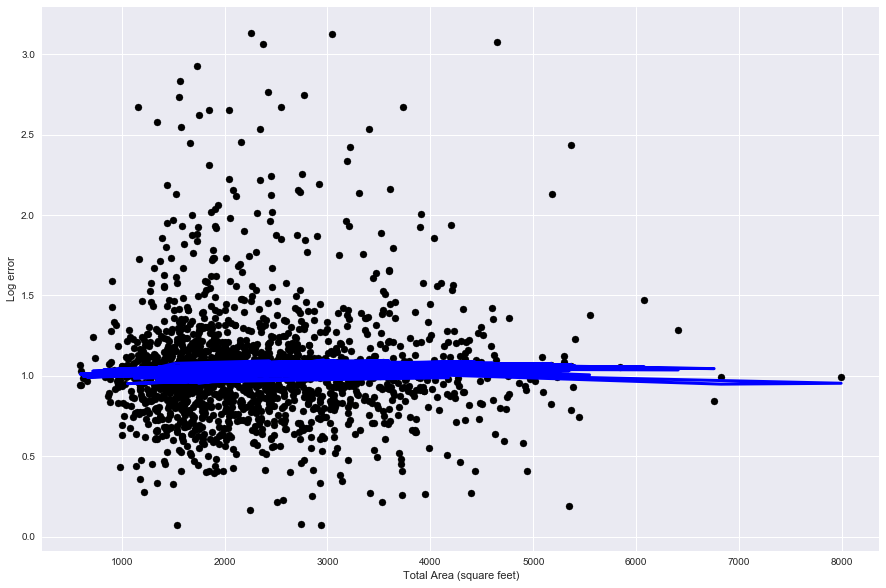

In [62]:
# Exp:3 (New model - with income and total area as features)

# Results
# Coefficients: 
#  [  3.43424755e-05  -4.29578248e-09  -8.56028955e-07]
# Mean squared error: 0.021633182
# Variance score: -0.020219379

import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Improvement_0 : Removed the NaN value from the training data
train_df_joined_no_logerror_nan = train_df_joined[numpy.isfinite(train_df_joined['logerror'])]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_nan = train_df_joined_no_logerror_nan [train_df_joined_no_logerror_nan ['logerror'] < 0.5]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_nan[numpy.isfinite(train_df_joined_no_logerror_nan['finishedsquarefeet15'])]
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan [train_df_joined_no_logerror_finishedsquarefeet15_nan ['finishedsquarefeet15'] < 10000]

# Removed NaN from median salary
train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan[numpy.isfinite(train_df_joined_no_logerror_finishedsquarefeet15_nan['mediansalary'])]

train_x1 = train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan.finishedsquarefeet15.values

# Converting the model to polynomial regression y = (a*x)+(a*x^2) from linear regression
train_x2 = np.power(train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan.finishedsquarefeet15.values, 2)

train_x3 = train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan.mediansalary.values

train_x = np.vstack((train_x1, train_x2, train_x3)).T

train_y = train_df_joined_no_logerror_finishedsquarefeet15_mediansalary_nan.logerror.values

# Improvement_3 : Scaling the y-axis to f(y) = 10^y values, where the y value is 'finishedsquarefeet15'
train_y = np.power(10,train_y)

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# coefficients
print('Coefficients: \n', regr.coef_)

test_x = train_x
test_y = train_y

pred_y = regr.predict(test_x)

# The mean squared error
print("Mean squared error: %.9f"
      % mean_squared_error(np.log10(test_y), np.log10(pred_y)))

# variance score
print("Variance score: %.9f"
      % r2_score(np.log10(test_y), np.log10(pred_y)))


plt.rcParams['figure.figsize']=(15,10)
plt.xlabel("Total Area (square feet)")
plt.ylabel("Log error")
plt.scatter(train_x1, train_y,  color='black')
plt.plot(train_x1, pred_y, color='blue', linewidth=3)
plt.show()

In [132]:
from sklearn import ensemble


# Improvement_0 : Removed the NaN value from the training data
train_df_joined_no_logerror_nan = train_df_joined[numpy.isfinite(train_df_joined['logerror'])]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_nan = train_df_joined_no_logerror_nan [train_df_joined_no_logerror_nan ['logerror'] < 0.5]

# Improvement_1 : Filter the outlier values from the training data
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_nan[numpy.isfinite(train_df_joined_no_logerror_nan['finishedsquarefeet15'])]
train_df_joined_no_logerror_finishedsquarefeet15_nan = train_df_joined_no_logerror_finishedsquarefeet15_nan [train_df_joined_no_logerror_finishedsquarefeet15_nan ['finishedsquarefeet15'] < 10000]


train_x1 = train_df_joined_no_logerror_finishedsquarefeet15_nan.finishedsquarefeet15.values

# Improvement_2 : Converting the model to polynomial regression y = (a*x)+(a*x^2) from linear regression
train_x2 = np.power(train_df_joined_no_logerror_finishedsquarefeet15_nan.finishedsquarefeet15.values, 2)
train_x = train_x1.reshape(-1, 1)
train_x

train_y = train_df_joined_no_logerror_finishedsquarefeet15_nan.logerror.values

# print (str(train_x.shape) + " and " + str(train_y.shape))

# Improvement_3 : Scaling the y-axis to f(y) = 10^y values, where the y value is 'finishedsquarefeet15'
train_y = np.power(10,train_y)

# regr1 = linear_model.LinearRegression()
# regr1.fit(train_x, train_y)


clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate=0.1, loss='ls')
clf.fit(train_x, train_y)

test_x = train_x
test_y = train_y
clf.score(test_x, test_y)



0.45506050510512075

<h1><center> Task 5 </center></h1>

In [ ]:
# Getting the Unique zipcodes



In [133]:
import pandas as pd
import numpy as numpy

df = pd.read_csv('properties_2017.csv', low_memory=False) # TODO: Need to change these files' locations

df_sample_submission = pd.read_csv('submission_v1.csv', low_memory=False) # TODO: Need to change these files' locations

df_zip_income = pd.read_csv('MedianZIP_Income.csv', low_memory=False)

df_new = df[numpy.isfinite(df['regionidzip'])]
df_new_unique_zip = df_new.regionidzip.unique()

# df_new_unique_zip


# Used mean salary in the data where values were missing

# df_left_unique_zip = df_new_unique_zip.notin(df_zip_income['regionidzip'].values)
# df_left_unique_zip
# print (list(set(df_new_unique_zip)-set(df_zip_income['regionidzip'].values)))
# df_zip_income.columns.values[0] = 'regionidzip'


df_zip_median_salary = df_zip_income.loc[df_zip_income['regionidzip'].isin(df_new_unique_zip)]
# df_zip_median_salary
df_with_income = pd.merge(df_zip_median_salary, df_new, on='regionidzip', how='outer')
df_with_income = df_with_income[numpy.isfinite(df_with_income['mediansalary'])]
# df_with_income
# df_with_income
# df_with_income.head(10)        


In [134]:
# Creating submission.csv to upload on Kaggle

parcel_value_list = df_sample_submission['ParcelId']

df_sampled = df_with_income[df_with_income.parcelid.isin(parcel_value_list)] #2985217 
df_sampled = df_sampled[['parcelid', 'finishedsquarefeet15', 'mediansalary']]

df_sampled = df_sampled.fillna(df_sampled.mean())
df_sampled.head(10)

# Note: Using the ^^mean value instead of removing the NaN rows.
df_sampled_no_struct_val_nan = df_sampled[numpy.isfinite(df_sampled['finishedsquarefeet15'])]
df_sampled_no_finishedsquarefeet15_mediansalary_nan = df_sampled_no_struct_val_nan[numpy.isfinite(df_sampled_no_struct_val_nan['mediansalary'])]


test_x1 = df_sampled_no_finishedsquarefeet15_mediansalary_nan['finishedsquarefeet15']
test_x2 = np.power(df_sampled_no_finishedsquarefeet15_mediansalary_nan.finishedsquarefeet15.values, 2)
train_x3 = df_sampled_no_finishedsquarefeet15_mediansalary_nan.mediansalary.values
test_x = np.vstack((test_x1, test_x2, train_x3)).T

# test_x.shape #190798, 2
# test_x.shape

pred_y_2017 = regr.predict(test_x)
pred_y_2017 = np.log10(np.absolute(pred_y_2017))

parcelids_non_nan = df_sampled_no_finishedsquarefeet15_mediansalary_nan['parcelid']

result_parcelids_non_nan_logerror = np.vstack((parcelids_non_nan, pred_y_2017)).T
# result_parcelids_non_nan_logerror

raw_data = {'ParcelId': parcelids_non_nan, '201710': pred_y_2017}
df_result_parcelids_non_nan_logerror = pd.DataFrame(raw_data, columns = ['ParcelId', '201710'])

raw_data_2 = {'ParcelId': parcel_value_list}
df_sample_submission_only_parcelIds = pd.DataFrame(raw_data_2, columns = ['ParcelId'])

df_final_submission = pd.merge(df_result_parcelids_non_nan_logerror, df_sample_submission_only_parcelIds, on='ParcelId', how='outer')

# len(df_final_submission) - df_final_submission.count()
# df.isnull().sum()
df_final_submission = df_final_submission.fillna(df_final_submission.mean())


# df_final_submission['201611'] = df_final_submission['201610']
# df_final_submission['201612'] = df_final_submission['201610']
df_sample_submission['201710'] = df_final_submission['201710']
df_sample_submission['201711'] = df_final_submission['201710']
df_sample_submission['201712'] = df_final_submission['201710']

df_sample_submission.to_csv('submission_v1_and_2017_data.csv', sep=',', index=False)

In [ ]:
# Trying on Lat Long Model???





In [135]:
# # Creating submission.csv to upload on Kaggle (2 - only with finishedsquarefeet15)

# parcel_value_list = df_sample_submission['ParcelId']

# df_sampled = df_with_income[df_with_income.parcelid.isin(parcel_value_list)] #2985217 
# df_sampled = df_sampled[['parcelid', 'finishedsquarefeet15', 'mediansalary']]

# df_sampled = df_sampled.fillna(df_sampled.mean())
# df_sampled.head(10)

# # Note: Using the ^^mean value instead of removing the NaN rows.
# df_sampled_no_struct_val_nan = df_sampled[numpy.isfinite(df_sampled['finishedsquarefeet15'])]
# df_sampled_no_finishedsquarefeet15_mediansalary_nan = df_sampled_no_struct_val_nan[numpy.isfinite(df_sampled_no_struct_val_nan['mediansalary'])]


# test_x1 = df_sampled_no_finishedsquarefeet15_mediansalary_nan['finishedsquarefeet15']
# test_x2 = np.power(df_sampled_no_finishedsquarefeet15_mediansalary_nan.finishedsquarefeet15.values, 2)
# train_x3 = df_sampled_no_finishedsquarefeet15_mediansalary_nan.mediansalary.values
# test_x = np.vstack((test_x1, test_x2)).T

# # test_x.shape #190798, 2
# # test_x.shape

# pred_y_2017 = clf.predict(test_x)

# # pred_y_2017 = np.log10(pred_y_2017)
# pred_y_2017 = np.log10(np.absolute(pred_y_2017))

# parcelids_non_nan = df_sampled_no_finishedsquarefeet15_mediansalary_nan['parcelid']

# result_parcelids_non_nan_logerror = np.vstack((parcelids_non_nan, pred_y_2017)).T
# # result_parcelids_non_nan_logerror

# raw_data = {'ParcelId': parcelids_non_nan, '201710': pred_y_2017}
# df_result_parcelids_non_nan_logerror = pd.DataFrame(raw_data, columns = ['ParcelId', '201710'])

# raw_data_2 = {'ParcelId': parcel_value_list}
# df_sample_submission_only_parcelIds = pd.DataFrame(raw_data_2, columns = ['ParcelId'])

# df_final_submission = pd.merge(df_result_parcelids_non_nan_logerror, df_sample_submission_only_parcelIds, on='ParcelId', how='outer')

# # len(df_final_submission) - df_final_submission.count()
# # df.isnull().sum()
# df_final_submission = df_final_submission.fillna(df_final_submission.mean())


# # df_final_submission['201611'] = df_final_submission['201610']
# # df_final_submission['201612'] = df_final_submission['201610']
# df_sample_submission['201710'] = df_final_submission['201710']
# df_sample_submission['201711'] = df_final_submission['201710']
# df_sample_submission['201712'] = df_final_submission['201710']

# df_sample_submission.to_csv('submission_v1_and_2017_data_2.csv', sep=',', index=False)

ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 2 

<h1><center> Task 6 </center></h1>

In [136]:
# Calculating the mean absolute error for "estimated-logerror" with "actual-logerror"

train_df_joined_parcelId_logerror = train_df_joined[['parcelid','logerror']] 
train_df_joined_parcelId_logerror = train_df_joined_parcelId_logerror[numpy.isfinite(train_df_joined_parcelId_logerror['parcelid'])]
train_df_joined_parcelId_logerror = train_df_joined_parcelId_logerror[numpy.isfinite(train_df_joined_parcelId_logerror['logerror'])]
train_df_joined_parcelId_logerror  

df_sample_submission_parcelId_logerror = df_sample_submission[['ParcelId', '201710']]
df_sample_submission_parcelId_logerror = df_sample_submission_parcelId_logerror[numpy.isfinite(df_sample_submission_parcelId_logerror['ParcelId'])]
df_sample_submission_parcelId_logerror = df_sample_submission_parcelId_logerror[numpy.isfinite(df_sample_submission_parcelId_logerror['201710'])]

df_sample_submission_parcelId_logerror = df_sample_submission_parcelId_logerror.rename(columns={'ParcelId': 'parcelid', '201710': 'estimatedlogerror'})

df_parcelId_logerror_estimatederror = pd.merge(train_df_joined_parcelId_logerror, df_sample_submission_parcelId_logerror, on='parcelid', how='outer')
df_parcelId_logerror_estimatederror = df_parcelId_logerror_estimatederror[numpy.isfinite(df_parcelId_logerror_estimatederror['parcelid'])]
df_parcelId_logerror_estimatederror = df_parcelId_logerror_estimatederror[numpy.isfinite(df_parcelId_logerror_estimatederror['estimatedlogerror'])]
df_parcelId_logerror_estimatederror = df_parcelId_logerror_estimatederror[numpy.isfinite(df_parcelId_logerror_estimatederror['logerror'])]
diff = np.abs(df_parcelId_logerror_estimatederror['estimatedlogerror'] - df_parcelId_logerror_estimatederror['logerror'])
estimated_mean_abs_error = diff.mean()
estimated_mean_abs_error #0.0719023399353336
# df_parcelId_logerror_estimatederror.head(15)



0.0719023399353336

In [ ]:

count = 0
for x in range(500):
    random_permutation = np.random.permutation(df_parcelId_logerror_estimatederror['logerror'])
    df_parcelId_logerror_estimatederror['logerror'] = random_permutation
    diff = np.abs(df_parcelId_logerror_estimatederror['estimatedlogerror'] - df_parcelId_logerror_estimatederror['logerror'])
    estimated_mean_abs_error = diff.mean()
    print ("Error" + str(estimated_mean_abs_error))
    if(estimated_mean_abs_error < 0.07171234112133791):
        count = count + 1 # number of times our model is performing worse
count = count/500
print ("Probability" + str(count))




In [ ]:
import matplotlib.pyplot as plt

count = 0
estimated_mean_abs_error_list = []
for x in range(500):
    random_permutation = np.random.permutation(df_parcelId_logerror_estimatederror['logerror'])
    diff = np.abs(df_parcelId_logerror_estimatederror['estimatedlogerror'] - random_permutation)
    mean_diff = diff.mean()
    estimated_mean_abs_error_list.append(mean_diff)
#     print ("Error" + str(mean_diff))
    if(mean_diff < 0.07171234112133791):
        count = count + 1 # number of times our model is performing worse
count = count/500
print ("Probability" + str(count))

estimated_mean_abs_error_list_scaled = [i * 1000 for i in estimated_mean_abs_error_list]
len(estimated_mean_abs_error_list_scaled)




In [152]:
width = .35
y_pos = np.arange(len(estimated_mean_abs_error_list_scaled))
plt.bar(y_pos, estimated_mean_abs_error_list_scaled, width = width, color="blue")

# ans = estimated_mean_abs_error_list.plot.bar('index', 'error')
# ans.set_ylim(ymin=1)
plt.show()


KeyboardInterrupt: 

In [50]:
df_correct_parcel_id_zip_map = pd.read_csv('external_parcelid_correct_zipcode_mapping.csv', low_memory=False)
df_correct_parcel_id_zip_map.columns = ['parcelid','zipcode']
df_to_save = df_correct_parcel_id_zip_map
df_to_save.to_csv('external_parcelid_correct_zipcode_mapping2.csv', sep=',', index=False)